# I. Import thư viện

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import string
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from underthesea import word_tokenize
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import neighbors
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import naive_bayes
import matplotlib.pyplot as plt
import numpy as np

# II. Đọc dữ liệu

In [2]:
data =  pd.read_csv("data/data.csv")
data.head()

,sent,sentiment
0,slide giáo trình đầy đủ .,postive
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",postive
2,đi học đầy đủ full điểm chuyên cần .,negative
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",postive


In [3]:
data.isna().sum()
data=data.dropna()

# III. Phân bố dữ liệu

In [4]:
class_count=data['sentiment'].value_counts()
class_count =[class_count['negative'],class_count['neutral'],class_count['postive']]

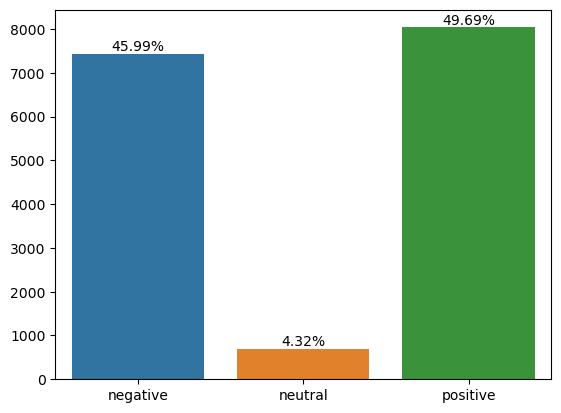

In [5]:
ax=sns.barplot(x=['negative','neutral','positive'], y=class_count, )
sum = class_count[0]+class_count[1]+class_count[2]
# Thêm chú thích trên từng cột
for i, value in enumerate(class_count):
    ax.text(i, value + 1, str(round(value/sum*100,2))+'%', ha='center', va='bottom')

# IV. Tiền xử lý dữ liệu

## 1. Làm sạch dữ liệu

In [6]:
import re
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = str(text)
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   
    
    return text

In [7]:
data['sent_clean'] = data['sent'].apply(cleaning)
data

,sent,sentiment,sent_clean
0,slide giáo trình đầy đủ .,postive,slide giáo trình đầy đủ
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",postive,nhiệt tình giảng dạy gần gũi với sinh viên
2,đi học đầy đủ full điểm chuyên cần .,negative,đi học đầy đủ full điểm chuyên cần
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative,chưa áp dụng công nghệ thông tin và các thiết ...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",postive,thầy giảng bài hay có nhiều bài tập ví dụ nga...
...,...,...,...
16172,hướng dẫn lab mơ hồ .,negative,hướng dẫn lab mơ hồ
16173,thầy cho chúng em những bài tập mang tính thực...,postive,thầy cho chúng em những bài tập mang tính thực...
16174,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,negative,thầy không dạy nhiều chủ yếu cho sinh viên tự ...
16175,em muốn đổi tên môn học vì tên môn là lập trìn...,negative,em muốn đổi tên môn học vì tên môn là lập trìn...


## 2. Tách từ (word tokenize)

In [8]:
data['sent_clean_tokenize']=data['sent_clean'].apply(lambda text: word_tokenize(text,format="text"))
data

,sent,sentiment,sent_clean,sent_clean_tokenize
0,slide giáo trình đầy đủ .,postive,slide giáo trình đầy đủ,slide giáo_trình đầy_đủ
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",postive,nhiệt tình giảng dạy gần gũi với sinh viên,nhiệt_tình giảng_dạy gần_gũi với sinh_viên
2,đi học đầy đủ full điểm chuyên cần .,negative,đi học đầy đủ full điểm chuyên cần,đi học đầy_đủ full_điểm chuyên cần
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative,chưa áp dụng công nghệ thông tin và các thiết ...,chưa áp_dụng công_nghệ_thông_tin và các thiết_...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",postive,thầy giảng bài hay có nhiều bài tập ví dụ nga...,thầy giảng bài hay có nhiều bài_tập ví_dụ ngay...
...,...,...,...,...
16172,hướng dẫn lab mơ hồ .,negative,hướng dẫn lab mơ hồ,hướng_dẫn lab mơ_hồ
16173,thầy cho chúng em những bài tập mang tính thực...,postive,thầy cho chúng em những bài tập mang tính thực...,thầy cho chúng_em những bài_tập mang tính thực...
16174,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,negative,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,thầy không dạy nhiều chủ_yếu cho sinh_viên tự ...
16175,em muốn đổi tên môn học vì tên môn là lập trìn...,negative,em muốn đổi tên môn học vì tên môn là lập trìn...,em muốn đổi tên môn_học vì tên môn là lập_trìn...


## 3. Loại bỏ stop words

In [9]:
my_file = open("data/stop words.txt", "r") 
data_file = my_file.read() 
stop_words_vn = data_file.split("\n") 
my_file.close() 

In [10]:
data['sent_clean_tokenize_nosw']=data['sent_clean_tokenize'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_vn)]))
data

,sent,sentiment,sent_clean,sent_clean_tokenize,sent_clean_tokenize_nosw
0,slide giáo trình đầy đủ .,postive,slide giáo trình đầy đủ,slide giáo_trình đầy_đủ,slide giáo_trình đầy_đủ
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",postive,nhiệt tình giảng dạy gần gũi với sinh viên,nhiệt_tình giảng_dạy gần_gũi với sinh_viên,nhiệt_tình giảng_dạy gần_gũi sinh_viên
2,đi học đầy đủ full điểm chuyên cần .,negative,đi học đầy đủ full điểm chuyên cần,đi học đầy_đủ full_điểm chuyên cần,đi học đầy_đủ full_điểm chuyên
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative,chưa áp dụng công nghệ thông tin và các thiết ...,chưa áp_dụng công_nghệ_thông_tin và các thiết_...,áp_dụng công_nghệ_thông_tin thiết_bị hỗ_trợ gi...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",postive,thầy giảng bài hay có nhiều bài tập ví dụ nga...,thầy giảng bài hay có nhiều bài_tập ví_dụ ngay...,thầy giảng bài_tập ví_dụ lớp
...,...,...,...,...,...
16172,hướng dẫn lab mơ hồ .,negative,hướng dẫn lab mơ hồ,hướng_dẫn lab mơ_hồ,hướng_dẫn lab mơ_hồ
16173,thầy cho chúng em những bài tập mang tính thực...,postive,thầy cho chúng em những bài tập mang tính thực...,thầy cho chúng_em những bài_tập mang tính thực...,thầy chúng_em bài_tập thực_hành thực_tiễn thực...
16174,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,negative,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,thầy không dạy nhiều chủ_yếu cho sinh_viên tự ...,thầy dạy chủ_yếu sinh_viên tìm_hiểu
16175,em muốn đổi tên môn học vì tên môn là lập trìn...,negative,em muốn đổi tên môn học vì tên môn là lập trìn...,em muốn đổi tên môn_học vì tên môn là lập_trìn...,đổi môn_học môn lập_trình c fraction_cplusplus...


## 4. Xóa bỏ các từ xuất hiện nhiều lần

In [11]:
cnt = Counter()
for text in data["sent_clean_tokenize_nosw"].values:
    for word in str(text).split():
        if word!='nhiệt_tình':
            cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
import plotly.express as px
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [12]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
data["sent_clean_tokenize_nosw_nofreq"] = data["sent_clean_tokenize_nosw"].apply(lambda text: remove_freqwords(text))
data

,sent,sentiment,sent_clean,sent_clean_tokenize,sent_clean_tokenize_nosw,sent_clean_tokenize_nosw_nofreq
0,slide giáo trình đầy đủ .,postive,slide giáo trình đầy đủ,slide giáo_trình đầy_đủ,slide giáo_trình đầy_đủ,slide giáo_trình đầy_đủ
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",postive,nhiệt tình giảng dạy gần gũi với sinh viên,nhiệt_tình giảng_dạy gần_gũi với sinh_viên,nhiệt_tình giảng_dạy gần_gũi sinh_viên,nhiệt_tình gần_gũi
2,đi học đầy đủ full điểm chuyên cần .,negative,đi học đầy đủ full điểm chuyên cần,đi học đầy_đủ full_điểm chuyên cần,đi học đầy_đủ full_điểm chuyên,đi đầy_đủ full_điểm chuyên
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative,chưa áp dụng công nghệ thông tin và các thiết ...,chưa áp_dụng công_nghệ_thông_tin và các thiết_...,áp_dụng công_nghệ_thông_tin thiết_bị hỗ_trợ gi...,áp_dụng công_nghệ_thông_tin thiết_bị hỗ_trợ
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",postive,thầy giảng bài hay có nhiều bài tập ví dụ nga...,thầy giảng bài hay có nhiều bài_tập ví_dụ ngay...,thầy giảng bài_tập ví_dụ lớp,ví_dụ lớp
...,...,...,...,...,...,...
16172,hướng dẫn lab mơ hồ .,negative,hướng dẫn lab mơ hồ,hướng_dẫn lab mơ_hồ,hướng_dẫn lab mơ_hồ,hướng_dẫn lab mơ_hồ
16173,thầy cho chúng em những bài tập mang tính thực...,postive,thầy cho chúng em những bài tập mang tính thực...,thầy cho chúng_em những bài_tập mang tính thực...,thầy chúng_em bài_tập thực_hành thực_tiễn thực...,chúng_em thực_tiễn thực_sự hài_lòng
16174,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,negative,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,thầy không dạy nhiều chủ_yếu cho sinh_viên tự ...,thầy dạy chủ_yếu sinh_viên tìm_hiểu,chủ_yếu tìm_hiểu
16175,em muốn đổi tên môn học vì tên môn là lập trìn...,negative,em muốn đổi tên môn học vì tên môn là lập trìn...,em muốn đổi tên môn_học vì tên môn là lập_trìn...,đổi môn_học môn lập_trình c fraction_cplusplus...,đổi môn_học môn lập_trình c fraction_cplusplus...


## 5. Mã hóa dữ liệu

In [13]:
le = LabelEncoder()
y = data['sentiment']
y = le.fit_transform(y) 
y

array([2, 2, 0, ..., 0, 0, 0])

In [14]:
# Vector hóa với CountVectorizer
cv = CountVectorizer()
text_counts_vec = cv.fit_transform(data['sent_clean_tokenize_nosw_nofreq'])

In [15]:
# Vector hóa với TfidfVectorizer
tfidf = TfidfVectorizer()
text_tfidf_vec = tfidf.fit_transform(data['sent_clean_tokenize_nosw_nofreq'])

# V. Train model

## 1. Train model dùng CountVectorizer

In [16]:
X=text_counts_vec
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [17]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinomialNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinomialNB model accuracy is 79.06%
------------------------------------------------
Confusion Matrix:
      0   1     2
0  1779  24   474
1   101   8    84
2   325   8  2050
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2277
           1       0.20      0.04      0.07       193
           2       0.79      0.86      0.82      2383

    accuracy                           0.79      4853
   macro avg       0.60      0.56      0.56      4853
weighted avg       0.77      0.79      0.78      4853



Text(0.5, 1.0, 'Confusion matrix NAIVE BAYES')

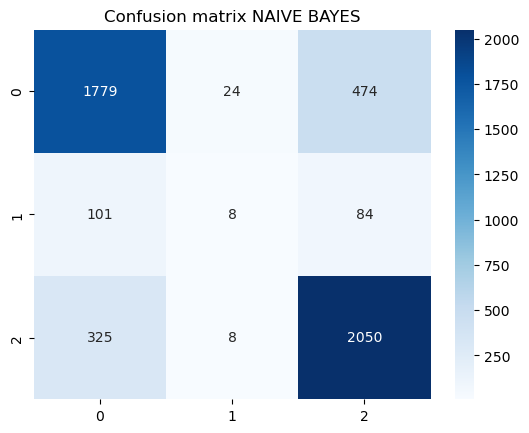

In [18]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predicted)), cmap='Blues', annot=True,fmt='g')
plt.title('Confusion matrix NAIVE BAYES')

## 2. Train model dùng TfidfVectorizer

In [19]:
X=text_tfidf_vec
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [20]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinomialNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinomialNB model accuracy is 79.41%
------------------------------------------------
Confusion Matrix:
      0  1     2
0  1815  0   462
1   104  2    87
2   346  0  2037
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2277
           1       1.00      0.01      0.02       193
           2       0.79      0.85      0.82      2383

    accuracy                           0.79      4853
   macro avg       0.86      0.55      0.55      4853
weighted avg       0.80      0.79      0.78      4853



Text(0.5, 1.0, 'Confusion matrix NAIVE BAYES')

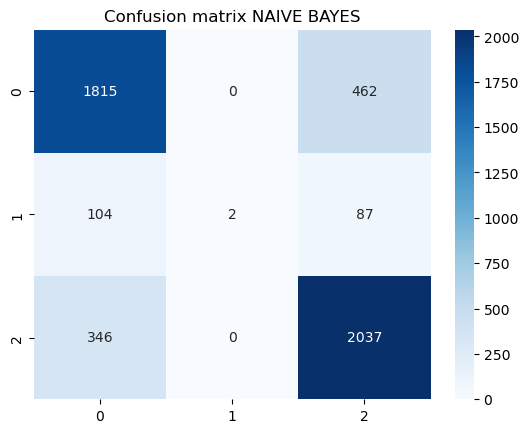

In [21]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predicted)), cmap='Blues', annot=True,fmt='g')
plt.title('Confusion matrix NAIVE BAYES')

# VI. So sánh với các mô hình khác

In [22]:
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SupportVectorMachines': svm.SVC(),
    'Decision Trees': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'NaiveBayes': MultinomialNB(),
    'AdaBoostClassifier': AdaBoostClassifier(learning_rate=0.5, random_state=2),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LightGBMClassifier': LGBMClassifier(),
    'XGBoost': XGBClassifier(objective='reg:squarederror', random_state=42, learning_rate=0.03, n_estimators=150, max_depth=9),
    'CatBoostRegressor': CatBoostClassifier(metric_period=100)
}
confusion_matrixs = []
accuracy_score_table = {'accuracy_score':[]}
for model_name, model_instance in models.items():
    model_instance.fit(X_train, y_train)
    predicted = model_instance.predict(X_test)
    accuracy_score = metrics.accuracy_score(predicted, y_test)
    accuracy_score_table['accuracy_score'].append((accuracy_score*100).round(2))
    print(f"-----{model_name}-----")
    print('Model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
    print('------------------------------------------------')
    print('Confusion Matrix:')
    print(pd.DataFrame(confusion_matrix(y_test, predicted)))
    confusion_matrixs.append(pd.DataFrame(confusion_matrix(y_test, predicted)))
    print('------------------------------------------------')
    print('Classification Report:')
    print(classification_report(y_test, predicted))


-----LogisticRegression-----
Model accuracy is 79.95%
------------------------------------------------
Confusion Matrix:
      0   1     2
0  1956   3   318
1   123  17    53
2   464  12  1907
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2277
           1       0.53      0.09      0.15       193
           2       0.84      0.80      0.82      2383

    accuracy                           0.80      4853
   macro avg       0.71      0.58      0.59      4853
weighted avg       0.79      0.80      0.79      4853

-----KNeighborsClassifier-----
Model accuracy is 63.98%
------------------------------------------------
Confusion Matrix:
      0    1     2
0  1056  178  1043
1    65   39    89
2   295   78  2010
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.75     

In [23]:
accuracy_score_table

{'accuracy_score': [79.95,
  63.98,
  80.45,
  74.68,
  78.28,
  79.41,
  73.81,
  75.54,
  77.64,
  74.9,
  78.34]}

In [24]:
model_names = {'model_name':[]}
for model_name, model_instance in models.items():
    model_names['model_name'].append(model_name)

In [25]:
model_names=pd.DataFrame(model_names)
model_accury=pd.DataFrame(accuracy_score_table)

In [26]:
comparison_table = pd.concat([model_names, model_accury],axis=1)
comparison_table.columns=['model_name', 'accuracy_score (%)']
comparison_table

,model_name,accuracy_score (%)
0,LogisticRegression,79.95
1,KNeighborsClassifier,63.98
2,SupportVectorMachines,80.45
3,Decision Trees,74.68
4,RandomForestClassifier,78.28
5,NaiveBayes,79.41
6,AdaBoostClassifier,73.81
7,GradientBoostingClassifier,75.54
8,LightGBMClassifier,77.64
9,XGBoost,74.90


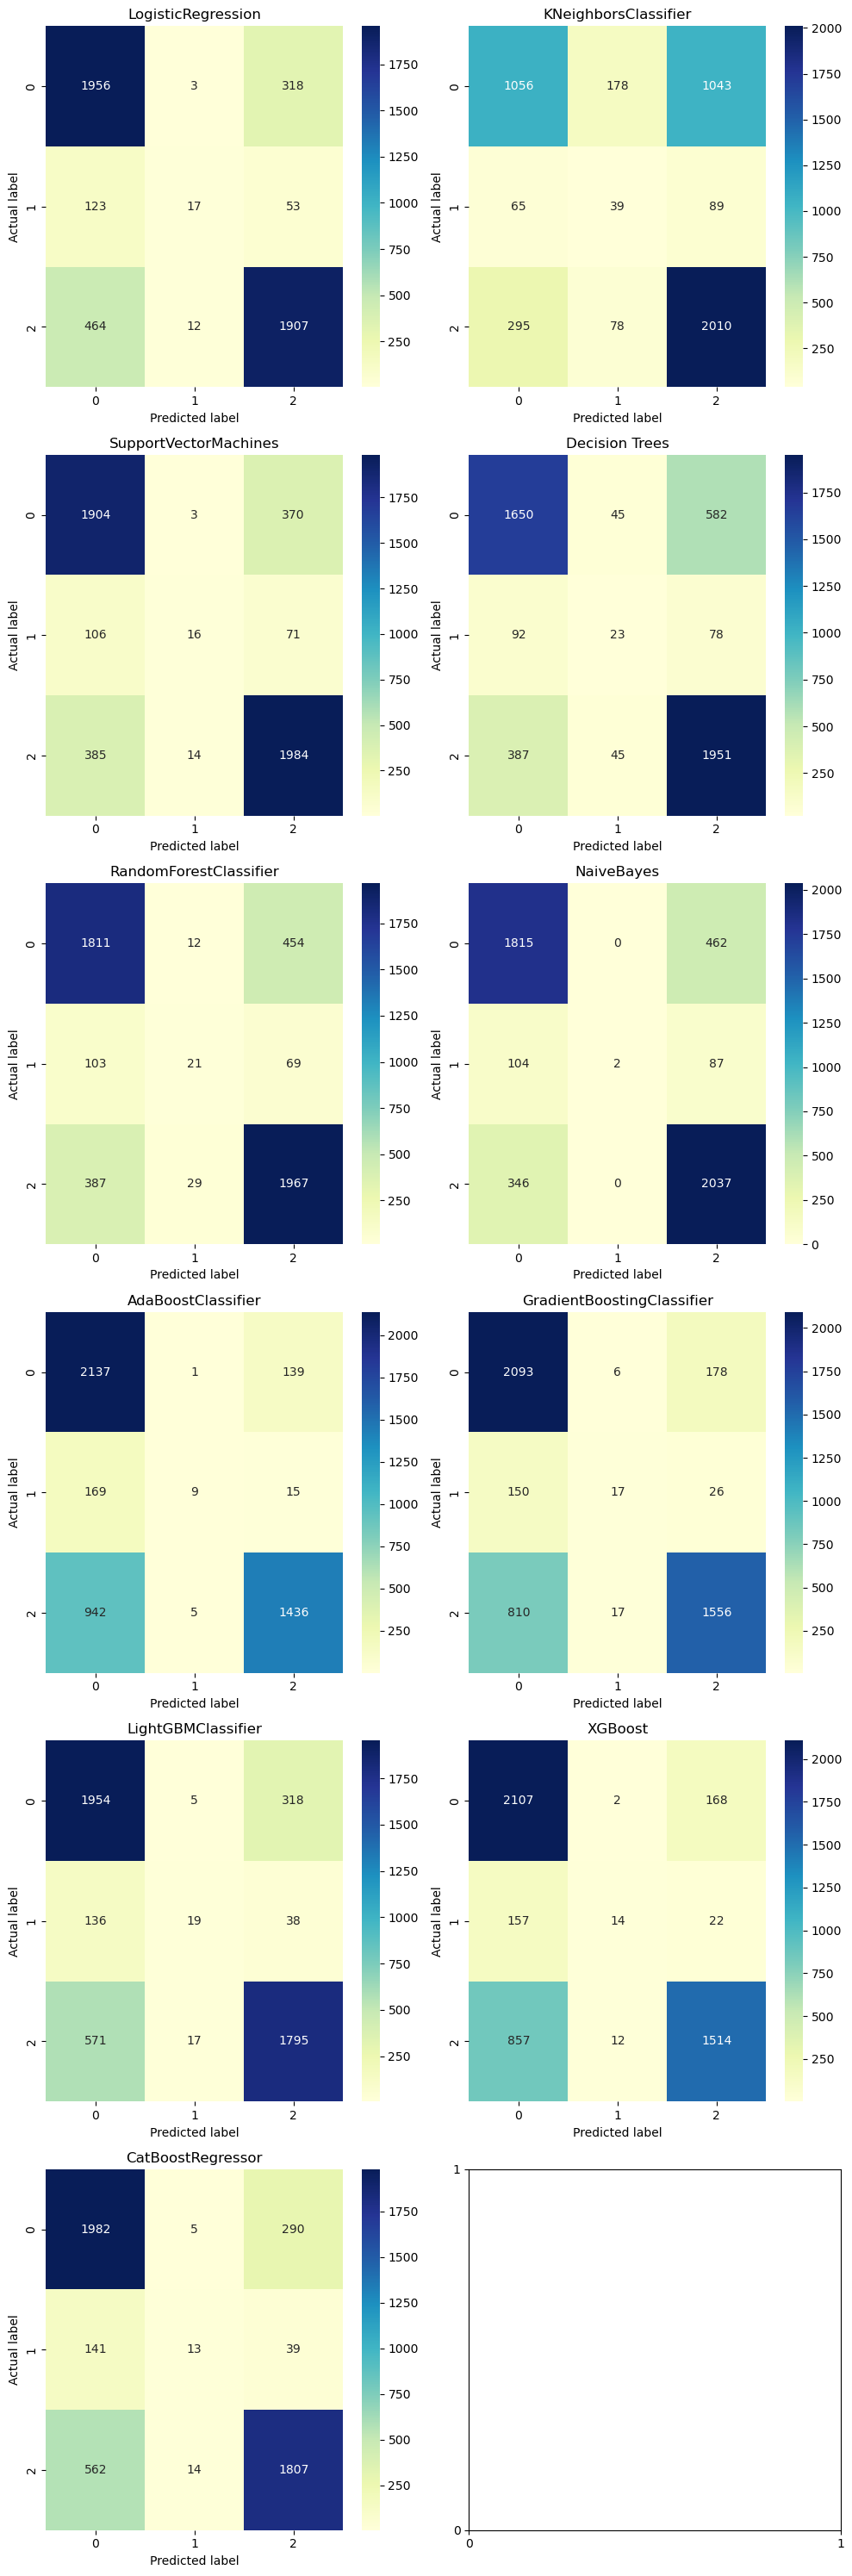

In [27]:
n_rows = 6
n_cols = 2
size = 5
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*size,n_rows*size))
k=-1
for i in range(0,n_rows):
  for j in range(0,n_cols):
    k+=1
    if k<11:
      ax_i = ax[i,j]
      class_names=[0,1] # name  of classes
      tick_marks = np.arange(len(class_names))
      plt.xticks(tick_marks, class_names)
      plt.yticks(tick_marks, class_names)
      # create heatmap
      sns.heatmap(pd.DataFrame(confusion_matrixs[k]), annot=True, cmap="YlGnBu" ,fmt='g', ax=ax_i)
      ax_i.xaxis.set_label_position("bottom")
      plt.tight_layout()
      ax_i.set_title(model_names.model_name[k])
      ax_i.set_ylabel('Actual label')
      ax_i.set_xlabel('Predicted label')
      plt.tight_layout()

# VII. Sử dụng Neural Network

In [28]:
# import tensorflow as tf
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense, Dropout

In [29]:
# y_train_nn = keras.utils.to_categorical(y_train, num_classes=3)

# VIII. Kiểm tra từng từ

In [30]:
test_data = pd.DataFrame([["giảng viên chửi mắng sinh viên"], ["giảng viên rất nhiệt tình"]])
test_data.columns = ['sent']
test_data['sent_clean'] = test_data['sent'].apply(cleaning)
from underthesea import word_tokenize
test_data['sent_clean_tokenize']=test_data['sent_clean'].apply(lambda text: word_tokenize(text,format="text"))
test_data['sent_clean_tokenize_nosw']=test_data['sent_clean_tokenize'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_vn)]))
test_data["wo_stopfreq"] = test_data["sent_clean_tokenize_nosw"].apply(lambda text: remove_freqwords(text))
test_data

,sent,sent_clean,sent_clean_tokenize,sent_clean_tokenize_nosw,wo_stopfreq
0,giảng viên chửi mắng sinh viên,giảng viên chửi mắng sinh viên,giảng_viên chửi mắng sinh_viên,giảng_viên chửi mắng sinh_viên,chửi mắng
1,giảng viên rất nhiệt tình,giảng viên rất nhiệt tình,giảng_viên rất nhiệt_tình,giảng_viên nhiệt_tình,nhiệt_tình


In [31]:
test_X = cv.transform(test_data['wo_stopfreq'])
predicted = MNB.predict(test_X)
predicted = pd.DataFrame(predicted)
res = pd.concat([test_data['sent'], predicted[0].apply(lambda x: "tích cực" if int(x)==2 else "tiêu cực" if int(x)==0 else "trung tính")], axis=1)
res.columns = ['sent', 'sentiment']
res

,sent,sentiment
0,giảng viên chửi mắng sinh viên,tiêu cực
1,giảng viên rất nhiệt tình,tích cực
